In [82]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [83]:
kon = 1e5
Ainnit = 1e-6
k = kon*Ainnit
rho = 0.3
delta = 10
r1_0 = 0
A2_0 = 0
A0_0 = 1
C = r1_0 - A2_0 + A0_0
koff = 1e-4
t_end = 10000
z0 = [A0_0, A2_0]
t = np.geomspace(1e-6, t_end, 10000)
t_span = [0, t_end]


In [84]:
def model(t, z):
    dA0 = -2*k*rho*z[0]*(1 - z[2]) + koff*(1- z[0] - z[1])*z[2]
    dA2 = k*rho*delta*(1 - z[0] - z[1])*(1-z[2]) - 2*koff*z[1]*z[2]
    dr1 = 2*k*rho*z[0]*(1-z[2]) - koff*(1 - z[0] - z[1])*z[2] + k*delta*rho*(1-z[0]-z[1]) - 2*koff*z[0]*z[2]

    return [dA0, dA2, dr1]

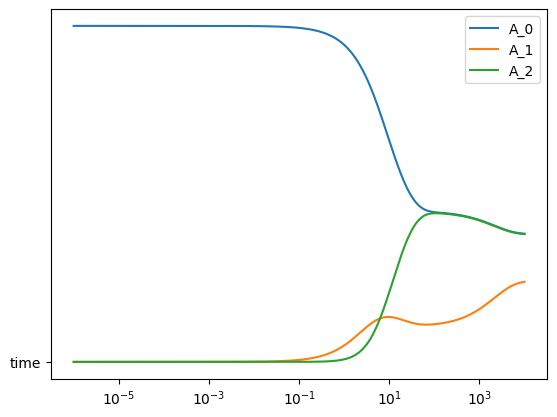

In [85]:
z = solve_ivp(model, t_span, z0, method="Radau", t_eval=t)

A1 = 1 - z.y[0] - z.y[1]
plt.semilogx(t, z.y[0], label ='A_0')
plt.semilogx(t, A1, label = 'A_1')
plt.semilogx(t, z.y[1], label ='A_2')
plt.semilogx('time')
plt.legend()
plt.show()